Kahhow Lee
## Machine Learning Fundamentals Capstone
<br>
Project divided into a few sections: <br>
(1) Data cleaning <br>
(2) Can we find age from drinks, drugs, smokes, height and education?<br>
(3) Can we find drugs from smokes, education and drinks?

In [280]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#options for pandas
pd.options.display.max_columns = 30


df = pd.read_csv('file:///Users/kahhow/Downloads/capstone_starter/profiles.csv', delimiter = ',')
df.head()




,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,...,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,...,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...",...,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,...,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,...,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


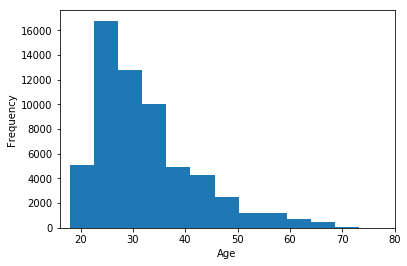

In [75]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()


In [45]:
df.count()

age            59946
body_type      54650
diet           35551
drinks         56961
drugs          45866
education      53318
essay0         54458
essay1         52374
essay2         50308
essay3         48470
essay4         49409
essay5         49096
essay6         46175
essay7         47495
essay8         40721
essay9         47343
ethnicity      54266
height         59943
income         59946
job            51748
last_online    59946
location       59946
offspring      24385
orientation    59946
pets           40025
religion       39720
sex            59946
sign           48890
smokes         54434
speaks         59896
status         59946
dtype: int64

In [46]:
df.income.min()

-1

In [47]:
df.income.max()

1000000

In [163]:
df.head(50)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,...,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,NaN,NaN,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,NaN,NaN,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,...,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,NaN,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...",...,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,NaN,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,...,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,NaN,NaN,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,...,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,NaN,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,...,white,67.0,-1,computer / hardware / software,2012-06-29-19-18,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,NaN,NaN,graduated from college/universi

## (1) Data Cleaning

In [165]:
# Create a dictionary using which we 
# will remap the values 
dict = {'never' : 0, 'sometimes' : 1, 'often' : 2} 
  
# Print the dictionary 
print(dict) 
  
# Remap the values of the dataframe 
df['drugs']= df['drugs'].map(dict) 
  
# Print the DataFrame after modification 
print(df) 

{'never': 0, 'sometimes': 1, 'often': 2}
       age       body_type                 diet      drinks  drugs  \
0       22  a little extra    strictly anything    socially    0.0   
1       35         average         mostly other       often    1.0   
2       38            thin             anything    socially    NaN   
3       23            thin           vegetarian    socially    NaN   
4       29        athletic                  NaN    socially    0.0   
5       29         average      mostly anything    socially    NaN   
6       32             fit    strictly anything    socially    0.0   
7       31         average      mostly anything    socially    0.0   
8       24             NaN    strictly anything    socially    NaN   
9       37        athletic      mostly anything  not at all    0.0   
10      35         average      mostly anything    socially    NaN   
11      28         average      mostly anything    socially    0.0   
12      24             NaN                  NaN  

In [104]:
df.head(80)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,...,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,0.0,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,...,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,1.0,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,...,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...",...,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,...,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,0.0,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,...,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single
5,29,average,mostly anything,socially,NaN,graduated from college/university,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,...,white,67.0,-1,computer / hardware / software,2012-06-29-19-18,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,no,"english (fluently), chinese (okay)",single
6,32,fit,strictly anything,socially,0.0

In [166]:
# Create a dictionary using which we 
# will remap the values 
dict1 = {'not at all' : 0, 'rarely': 1, 'socially' : 2, 'often' : 3, 'very often':4, 'desperately':5} 

# Print the dictionary 
print(dict1) 
  
# Remap the values of the dataframe 
df['drinks']= df['drinks'].map(dict1) 
  
print(df)

{'not at all': 0, 'rarely': 1, 'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}
       age       body_type                 diet  drinks  drugs  \
0       22  a little extra    strictly anything     2.0    0.0   
1       35         average         mostly other     3.0    1.0   
2       38            thin             anything     2.0    NaN   
3       23            thin           vegetarian     2.0    NaN   
4       29        athletic                  NaN     2.0    0.0   
5       29         average      mostly anything     2.0    NaN   
6       32             fit    strictly anything     2.0    0.0   
7       31         average      mostly anything     2.0    0.0   
8       24             NaN    strictly anything     2.0    NaN   
9       37        athletic      mostly anything     0.0    0.0   
10      35         average      mostly anything     2.0    NaN   
11      28         average      mostly anything     2.0    0.0   
12      24             NaN                  NaN  

In [167]:
df['drinks'] = df['drinks'].fillna(0)
df['drugs']=df['drugs'].fillna(0)
print(df)

       age       body_type                 diet  drinks  drugs  \
0       22  a little extra    strictly anything     2.0    0.0   
1       35         average         mostly other     3.0    1.0   
2       38            thin             anything     2.0    0.0   
3       23            thin           vegetarian     2.0    0.0   
4       29        athletic                  NaN     2.0    0.0   
5       29         average      mostly anything     2.0    0.0   
6       32             fit    strictly anything     2.0    0.0   
7       31         average      mostly anything     2.0    0.0   
8       24             NaN    strictly anything     2.0    0.0   
9       37        athletic      mostly anything     0.0    0.0   
10      35         average      mostly anything     2.0    0.0   
11      28         average      mostly anything     2.0    0.0   
12      24             NaN                  NaN     3.0    0.0   
13      30          skinny      mostly anything     2.0    0.0   
14      29

In [226]:
# map smokes responses to a number code

smokes_codes = {
    "no": 0,
    "trying to quit":1,
    "when drinking": 2,
    "sometimes": 3,
    "yes": 4,
}

df["smokes"] = df['smokes'].map(smokes_codes)


In [227]:
education_codes={
    "working on space camp":1,
    "working on two-year college":2,
    "working on college/university":3,
    "graduated from college/university":4,
    "working on masters program":5,
    "graduated from masters program":6
}

df["education"] = df['education'].map(education_codes)

In [228]:
df.head(80)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,...,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status,smokes_code,education_code
0,22,a little extra,strictly anything,2.0,0.0,3.0,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,...,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,3,english,single,3,3.0
1,35,average,mostly other,3.0,1.0,1.0,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,...,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,0,"english (fluently), spanish (poorly), french (...",single,0,1.0
2,38,thin,anything,2.0,0.0,6.0,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...",...,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,0,"english, french, c++",available,0,6.0
3,23,thin,vegetarian,2.0,0.0,3.0,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,...,20000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,0,"english, german (poorly)",single,0,3.0
4,29,athletic,NaN,2.0,0.0,4.0,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,...,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,0,english,single,0,4.0
5,29,average,mostly anything,2.0,0.0,4.0,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,"books: to kill a mockingbird, lord of the ring...","like everyone else, i love my friends and fami...",what my contribution to the world is going to ...,out with my friends!,i cried on my first day at school because a bi...,...,-1,computer / hardware / software,2012-06-29-19-18,"san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes cats,atheism,m,taurus,0,"english (fluently), chinese (okay)",single,0,4.0
7,31,average,mostly anything,2.0,0.0,4.0,NaN,"writing. meeting new people, spending time wit...","remembering people's birthdays, sending cards,...",i'm rather approachable (a byproduct of being ...,"i like: alphabetized lists, aquariums, autobio...","friends, family, notebook/p

In [230]:
# check which columns have NaN values
df.isna().any()
#remove NaNs in columns
other_columns_with_nan_values = [
    'drinks', 
    'drugs', 
    'height', 
    'smokes',
    'education'
]
df.dropna(subset=other_columns_with_nan_values, inplace=True)

## (2) Can we find age from drinks, drugs, smokes, height and education?

Train score:
0.12200814282444228
Test score:
0.12411022136173133


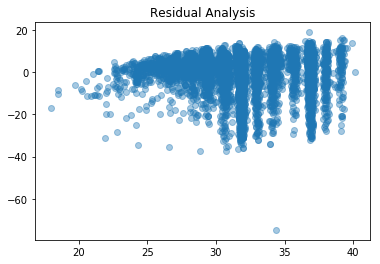

In [237]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


x = df[['drugs','drinks','height','education','smokes','income']]

y = df[['age']]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

lm = LinearRegression()

lm.fit(x_train, y_train)
y_predict = lm.predict(x_test)

# Input code here:

print("Train score:")
print(lm.score(x_train,y_train))

print("Test score:")
print(lm.score(x_test,y_test))

residuals = y_predict - y_test
plt.scatter(y_predict, residuals, alpha=0.4)
plt.title('Residual Analysis')

plt.show()

Train score:
0.12200814282444228
Test score:
0.12411022136173133


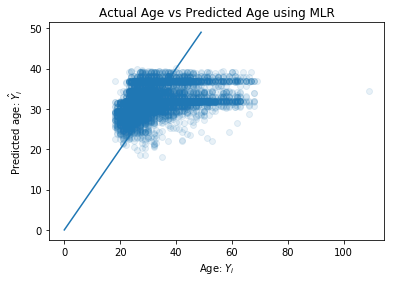

In [256]:

model = lm.fit(x_train, y_train)

y_predict= lm.predict(x_test)

print("Train score:")
print(lm.score(x_train, y_train))

print("Test score:")
print(lm.score(x_test, y_test))

plt.scatter(y_test, y_predict, alpha=0.1)
plt.plot(range(50), range(50))

plt.xlabel("Age: $Y_i$")
plt.ylabel("Predicted age: $\hat{Y}_i$")
plt.title("Actual Age vs Predicted Age using MLR")

plt.show()

KNR training set score: 0.2924631217790834
KNR test set score: 0.11072117958104498


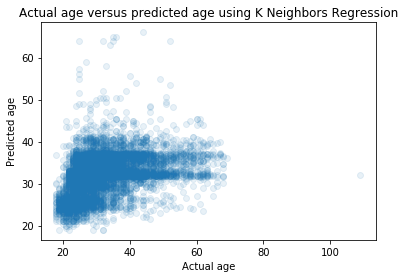

In [264]:
from sklearn.neighbors import KNeighborsRegressor

kn_regressor = KNeighborsRegressor(n_neighbors = 250, weights = "distance")
kn_regressor.fit(x_train, y_train)

knr_training_score = kn_regressor.score(x_train, y_train)

print("KNR training set score: %s" %(knr_training_score))

knr_test_score = kn_regressor.score(x_test, y_test)

print("KNR test set score: %s" %(knr_test_score))

#generate plot showing difference between predicted age and actual age using K Neighbors Regressor

knr_predictions = kn_regressor.predict(x_test)

plt.scatter(y_test, knr_predictions,  alpha=0.1)
plt.title("Actual age versus predicted age using K Neighbors Regression")
plt.xlabel("Actual age")
plt.ylabel("Predicted age")
plt.show()

## (2) Analysis - Can we find age from drinks, drugs, smokes, height and education?
- Both K Neighbors Regression and Multiple Linear Regression (MLR) were disappointingly inaccurate
- MLR is slightly more accurate than K Neighbors Regression
- The advantage of MLR is that is easy to fit and interpret, in this instance, the presumption of a linear relationship between the data works relatively better than the non-parametric method
- Both models are relatively simple and quick to run

## (3)  Can we find drugs from smokes, education and drinks?

In [269]:

# select features and scale data for regression

from sklearn.preprocessing import scale

list_of_features_classification = [
    'drinks',
    'smokes',
    'age',
    'income'
]
features_classification = df[list_of_features_classification]
scaled_features_classification = scale(features_classification, axis=0)
labels = df['drugs']

In [270]:
# generate training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(scaled_features_classification, labels, test_size=0.2, random_state=40)

In [272]:
# build K Nearest Neighbors model to predict drug use

from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier(n_neighbors=76)
knn_classifier.fit(train_data, train_labels)

knn_training_score = knn_classifier.score(train_data, train_labels)

print("KNN training set score: %s" %(knn_training_score))

knn_test_score = knn_classifier.score(test_data, test_labels)

print("KNN test set score: %s" %(knn_test_score))

KNN training set score: 0.864865740290869
KNN test set score: 0.8638424666407566


In [273]:
# generate classification report and confusion matrix for K Nearest Neighbors classifier

from sklearn.metrics import classification_report, confusion_matrix 

knn_predictions = knn_classifier.predict(test_data)
print(confusion_matrix(test_labels, knn_predictions))
print(classification_report(test_labels, knn_predictions))

[[6594   83    0]
 [ 925   74    0]
 [  33   10    0]]
             precision    recall  f1-score   support

        0.0       0.87      0.99      0.93      6677
        1.0       0.44      0.07      0.13       999
        2.0       0.00      0.00      0.00        43

avg / total       0.81      0.86      0.82      7719



/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


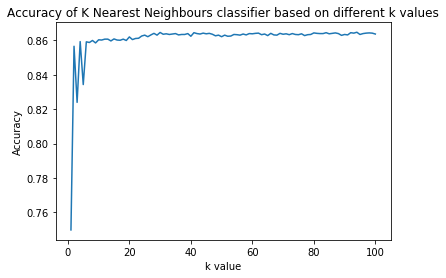

{'k': 94, 'score': 0.8647493198600855}


In [274]:
# generate plot showing K Nearest Neighbors classifier score based on different n_neighbors values 
# and print out n_neighbors value that results in highest score

scores = []

highest_score = {
    'k': 0,
    'score': 0
}

for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_data, train_labels)
    score = classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'k': k,
            'score': score
        }

x_values = range(1, 101)

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of K Nearest Neighbours classifier based on different k values')
plt.ylabel('Accuracy')
plt.xlabel('k value')
plt.show()
print(highest_score)

In [277]:
#Use of support vector machine classification
from sklearn.svm import SVC

svc_classifier = SVC(kernel='rbf', gamma=10)
svc_classifier.fit(train_data, train_labels)

svc_training_score = svc_classifier.score(train_data, train_labels)

print("SVC training set score: %s" %(svc_training_score))

svc_test_score = classifier.score(test_data, test_labels)

print("SVC test set score: %s" %(svc_test_score))

SVC training set score: 0.8707932497651669
SVC test set score: 0.8637129161808524


In [278]:
# generate classification report and confusion matrix for Support Vector Machines classifier

from sklearn.metrics import classification_report, confusion_matrix 

svc_predictions = svc_classifier.predict(test_data)
print(confusion_matrix(test_labels, svc_predictions))
print(classification_report(test_labels, svc_predictions))

[[6592   84    1]
 [ 935   64    0]
 [  39    4    0]]
             precision    recall  f1-score   support

        0.0       0.87      0.99      0.93      6677
        1.0       0.42      0.06      0.11       999
        2.0       0.00      0.00      0.00        43

avg / total       0.81      0.86      0.82      7719



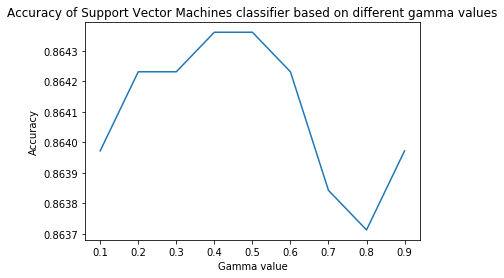

{'gamma': 0.4, 'score': 0.8643606684803731}


In [279]:
# generate plot showing SVC Classifier score based on different gamma values 
# and print out gamma value that results in highest score

scores = []

highest_score = {
    'gamma': 0,
    'score': 0
}

gamma_values = np.arange(0.1, 1.0, 0.1)

for val in gamma_values:
    svc_classifier = SVC(kernel='rbf', gamma=val)
    svc_classifier.fit(train_data, train_labels)
    score = svc_classifier.score(test_data, test_labels)
    scores.append(score)
    if score > highest_score['score']:
        highest_score = {
            'gamma': val,
            'score': score
        }

x_values = gamma_values

y_values = scores

plt.plot(x_values, y_values)
plt.title('Accuracy of Support Vector Machines classifier based on different gamma values')
plt.ylabel('Accuracy')
plt.xlabel('Gamma value')
plt.show()
print(highest_score)

## (3) Analysis: Can we find drugs from smokes, education and drinks?
- SVM v K neighbor classifier both presented similar accuracy and were both surprisingly accurate (~0.86)
- SVM was relatively easier to implement and ran quicker than K neighbor classifier